# Hint
1.You can preprocess the data to help your training

2.Since you don't have y_test this time, you may need to split a validation set for checking your performance

3.It is possible to use regression model as a classifier, for example RidgeClassifier.

# Read this note carefully
## Submit to iLMS with your code file Lab05_{student_id}.ipynb (e.g. Lab05_109069999.ipynb) and prediction file y_pred.csv. The notebook should contain
1.How you evaluate your model.

2.All models you have tried and the corresponding results.

3.Plot the error curve of your best model and tell if it is over-fit or not.

4.The top-3 features you find and how you find it .

5.A brief report what you do in this assignment.

# Deadline: 2020-10-08(Thur) 23:59.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Perceptron
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

2 Physical GPUs, 1 Logical GPUs


In [3]:
X_train = pd.read_csv('./data/X_train.csv')
Y_train = pd.read_csv('./data/y_train.csv')

X_test = pd.read_csv('./data/X_test.csv')
print(X_train.shape)
print(X_train.columns)
print(Y_train.columns)
X_train.head()

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [4]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, test_size=0.3, random_state=0)

print('#Training data points: %d' % x_train.shape[0])
print('#Testing data points: %d' % x_val.shape[0])

#Training data points: 60025
#Testing data points: 25726


# linear regression

degree = 1, Train r2_score: 0.05176, Test r2_score: 0.05298 
degree = 2, Train r2_score: 0.06649, Test r2_score: 0.06349 
degree = 3, Train r2_score: 0.07057, Test r2_score: 0.06347 
degree = 4, Train r2_score: 0.07714, Test r2_score: 0.05039 
degree = 5, Train r2_score: 0.08967, Test r2_score: -0.36168 
degree = 6, Train r2_score: 0.10024, Test r2_score: -2.72094 


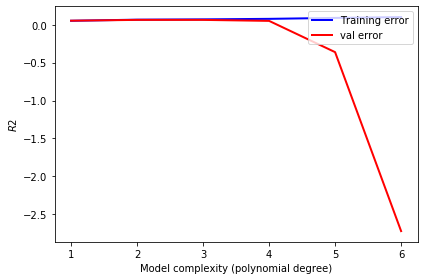

In [6]:
r2_train = []
r2_val = []

max_degree = 7

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(x_train)
    X_val_poly = poly.transform(x_val)
    
    regr = LinearRegression()
    regr = regr.fit(X_train_poly, y_train)
    y_train_pred = regr.predict(X_train_poly)
    y_val_pred = regr.predict(X_val_poly)
    
    r2_train.append(r2_score(y_train, y_train_pred))
    r2_val.append(r2_score(y_val, y_val_pred))
    
    print('degree = %d, Train r2_score: %.5f, Test r2_score: %.5f ' 
          % (d, r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)))
    

plt.plot(range(1, max_degree), r2_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), r2_val, label = 'val error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$R2$')
plt.tight_layout()
plt.show()

## 可以看到R2 score約 = 0.05，且degree > 3後有overfit之情形

degree = 1, Train r2_score: 0.05176, Test r2_score: 0.05298 
degree = 2, Train r2_score: 0.06649, Test r2_score: 0.06349 
degree = 3, Train r2_score: 0.07057, Test r2_score: 0.06348 
degree = 4, Train r2_score: 0.07714, Test r2_score: 0.05039 
degree = 5, Train r2_score: 0.08996, Test r2_score: -0.33671 
degree = 6, Train r2_score: 0.11103, Test r2_score: -11.26836 


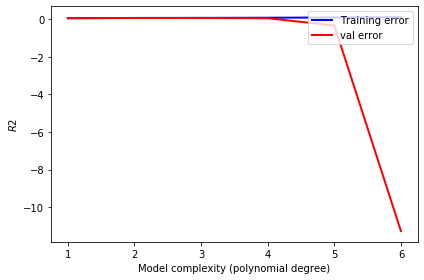

In [8]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)

r2_train = []
r2_val = []

max_degree = 7

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(x_train_std)
    X_val_poly = poly.transform(x_val_std)
    
    regr = LinearRegression()
    regr = regr.fit(X_train_poly, y_train)
    y_train_pred = regr.predict(X_train_poly)
    y_val_pred = regr.predict(X_val_poly)
    
    r2_train.append(r2_score(y_train, y_train_pred))
    r2_val.append(r2_score(y_val, y_val_pred))
    
    print('degree = %d, Train r2_score: %.5f, Test r2_score: %.5f ' 
          % (d, r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)))
    
plt.plot(range(1, max_degree), r2_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), r2_val, label = 'val error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$R2$')
plt.tight_layout()
plt.show()

## 標準化後結果也類似

# Ridge Regression

In [12]:
max_degree = 5

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(x_train)
    X_val_poly = poly.transform(x_val)
    
    lr_rg = Ridge(alpha=10)
    lr_rg.fit(X_train_poly, y_train)

    y_train_pred = lr_rg.predict(X_train_poly)
    y_val_pred = lr_rg.predict(X_val_poly)

    print('degree = %d, Train r2_score: %.5f, Test r2_score: %.5f ' 
          % (d, r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)))

degree = 1, Train r2_score: 0.05176, Test r2_score: 0.05298 
degree = 2, Train r2_score: 0.06649, Test r2_score: 0.06350 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.23132e-20): result may not be accurate.
  overwrite_a=True).T


degree = 3, Train r2_score: 0.07057, Test r2_score: 0.06347 
degree = 4, Train r2_score: 0.07712, Test r2_score: 0.05061 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.03619e-26): result may not be accurate.
  overwrite_a=True).T


# Lasso

In [13]:
max_degree = 5

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(x_train)
    X_val_poly = poly.transform(x_val)

    lasso = Lasso(alpha=10)
    lasso.fit(X_train_poly, y_train)

    y_train_pred = lasso.predict(X_train_poly)
    y_val_pred = lasso.predict(X_val_poly)

    print('degree = %d, Train r2_score: %.5f, Test r2_score: %.5f ' 
          % (d, r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)))

degree = 1, Train r2_score: 0.00000, Test r2_score: -0.00019 
degree = 2, Train r2_score: 0.03695, Test r2_score: 0.03712 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5377.2622958376305, tolerance: 1.486619002082462
  positive)


degree = 3, Train r2_score: 0.04944, Test r2_score: 0.04942 
degree = 4, Train r2_score: 0.06028, Test r2_score: 0.05580 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7004.637323439849, tolerance: 1.486619002082462
  positive)


# Random Forest regression

10 tree, Train r2_score: 0.81413, Test r2_score: -0.05377 
100 tree, Train r2_score: 0.86367, Test r2_score: 0.02722 
250 tree, Train r2_score: 0.86703, Test r2_score: 0.03327 
500 tree, Train r2_score: 0.86823, Test r2_score: 0.03546 
1000 tree, Train r2_score: 0.86881, Test r2_score: 0.03631 


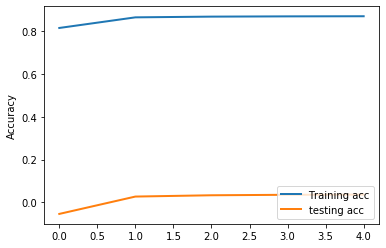

In [14]:
tre_num = [10, 100, 250, 500, 1000]

r2_train = []
r2_test = []

for num in tre_num:
    forest = RandomForestRegressor(
        n_estimators=num, criterion='mse', random_state=1, n_jobs=-1)
    forest.fit(x_train, y_train.values.ravel())

    y_train_pred = forest.predict(x_train)
    y_val_pred = forest.predict(x_val)

    r2_train.append(r2_score(y_train.values.ravel(), y_train_pred))
    r2_test.append(r2_score(y_val.values.ravel(), y_val_pred))

    print('%d tree, Train r2_score: %.5f, Test r2_score: %.5f ' 
          % (num, r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)))
    
plt.plot(r2_train, label = 'Training acc', linewidth = 2)
plt.plot(r2_test, label = 'testing acc', linewidth = 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy') 
plt.show()

# 可以看到R2 score隨著tree數項增加，最多大約提升到0.3

# Perceptron

In [15]:
ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
ppn.fit(x_train, y_train.values.ravel())

y_train_pred = ppn.predict(x_train)
y_val_pred = ppn.predict(x_val)
print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Perceptron)' 
      % (accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)))

Training Accuracy: 0.46, Testing Accuracy: 0.47 (Perceptron)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## 增加迭代次數以收斂

In [16]:
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)
ppn.fit(x_train, y_train.values.ravel())

y_train_pred = ppn.predict(x_train)
y_val_pred = ppn.predict(x_val)
print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Perceptron)' 
      % (accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)))

Training Accuracy: 0.59, Testing Accuracy: 0.59 (Perceptron)


## 標準化

In [19]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)

ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
ppn.fit(x_train_std, y_train.values.ravel())

y_train_pred = ppn.predict(x_train_std)
y_val_pred = ppn.predict(x_val_std)
print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Perceptron)' 
      % (accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)))

Training Accuracy: 0.57, Testing Accuracy: 0.58 (Perceptron)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## 和未標準化最終結果相似，但可用較少跌代次數達到相同效果

# Random Forest Classifier

5 tree, Training Accuracy: 0.61883, Testing Accuracy: 0.61098
10 tree, Training Accuracy: 0.61964, Testing Accuracy: 0.61148
15 tree, Training Accuracy: 0.62041, Testing Accuracy: 0.61296
20 tree, Training Accuracy: 0.62029, Testing Accuracy: 0.61304
25 tree, Training Accuracy: 0.62004, Testing Accuracy: 0.61265
50 tree, Training Accuracy: 0.61973, Testing Accuracy: 0.61125
100 tree, Training Accuracy: 0.62031, Testing Accuracy: 0.61148
250 tree, Training Accuracy: 0.62034, Testing Accuracy: 0.61218


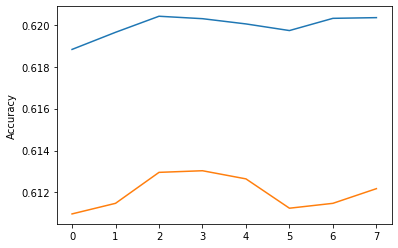

In [22]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)

tre_num = [5, 10, 15, 20, 25, 50, 100, 250]

acc_train = []
acc_val = []

for num in tre_num:
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=num, 
                                    max_depth=5,
                                    random_state=1,
                                    n_jobs=2)

    forest.fit(x_train_std, y_train.values.ravel())
    
    y_train_pred = forest.predict(x_train_std)
    y_val_pred = forest.predict(x_val_std)

    acc_train.append(accuracy_score(y_train.values.ravel(), y_train_pred))
    acc_val.append(accuracy_score(y_val.values.ravel(), y_val_pred))

    print('%d tree, Training Accuracy: %.5f, Testing Accuracy: %.5f' 
      % (num, accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)))
    
plt.plot(acc_train)
plt.plot(acc_val)
plt.ylabel('Accuracy') 
plt.show()

## tree 數量大約到20以上會有overfit

# 用Random Forest Classifier 做特徵選取

## 用窮舉法，每次選三個feature train

PERIOD GAME_CLOCK SHOT_CLOCK
Training Accuracy: 0.56773, Testing Accuracy: 0.55807
PERIOD GAME_CLOCK SHOT_DIST
Training Accuracy: 0.61066, Testing Accuracy: 0.60429
PERIOD SHOT_CLOCK SHOT_DIST
Training Accuracy: 0.61349, Testing Accuracy: 0.60515
PERIOD DRIBBLES SHOT_DIST
Training Accuracy: 0.61190, Testing Accuracy: 0.60639
PERIOD SHOT_DIST CLOSE_DEF_DIST
Training Accuracy: 0.61478, Testing Accuracy: 0.60896
DRIBBLES SHOT_DIST CLOSE_DEF_DIST
Training Accuracy: 0.61666, Testing Accuracy: 0.60977
TOUCH_TIME SHOT_DIST CLOSE_DEF_DIST
Training Accuracy: 0.62016, Testing Accuracy: 0.61249


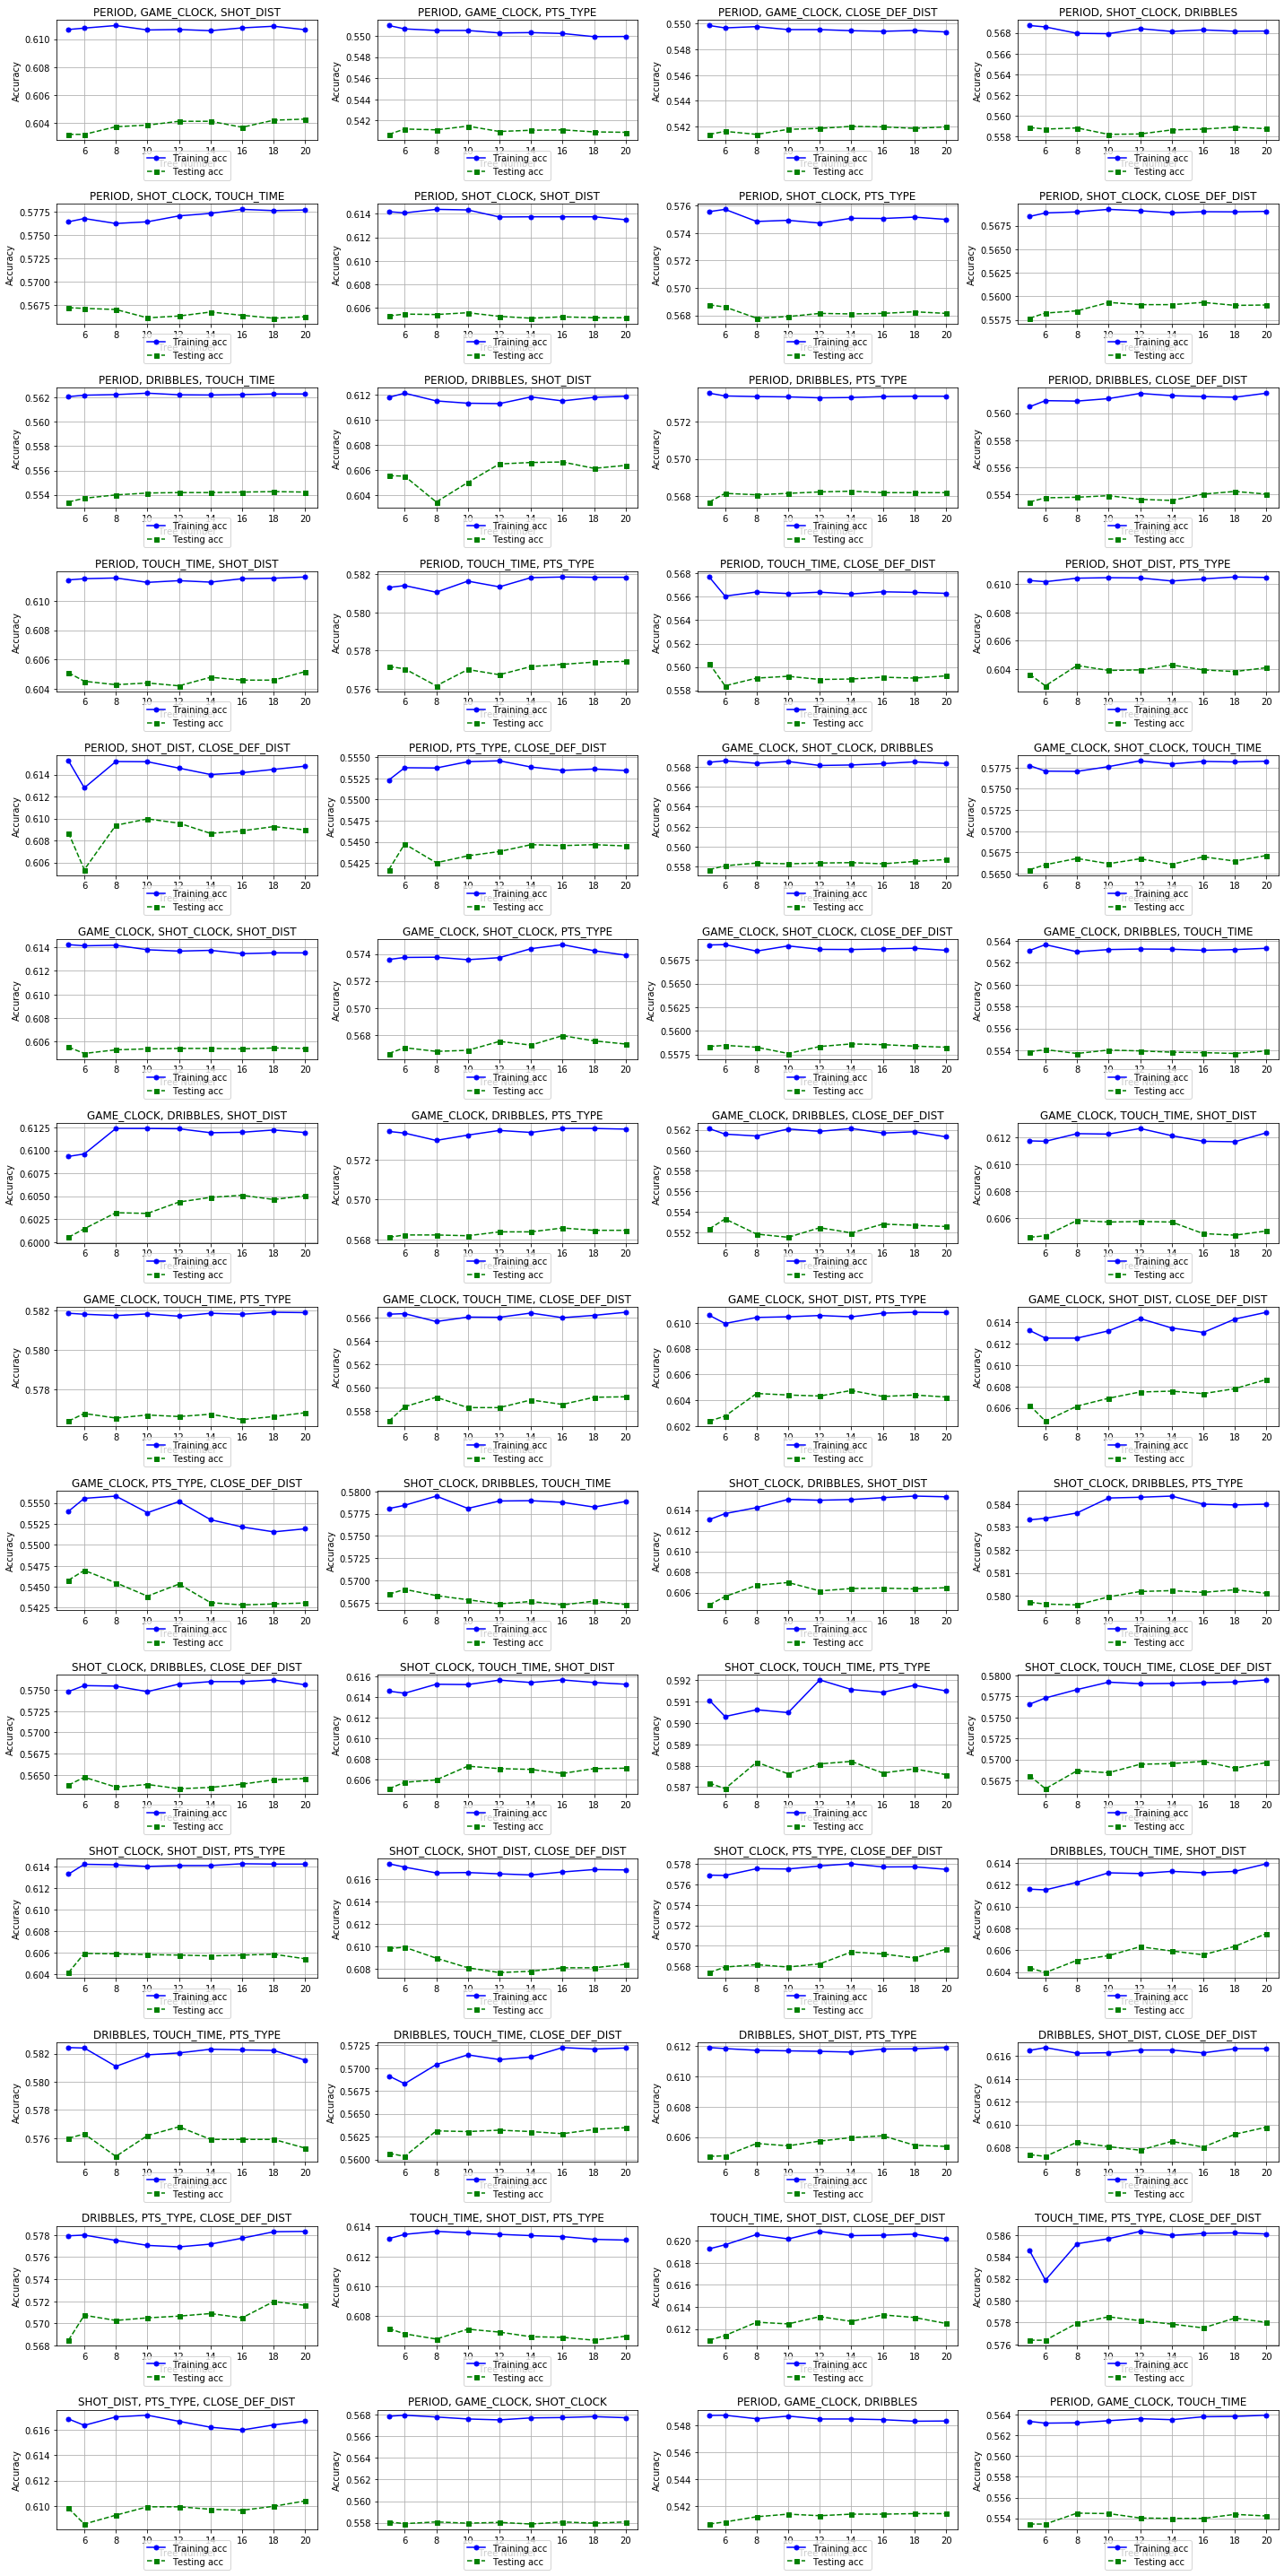

In [23]:
trees_num = [5, 6, 8, 10, 12, 14, 16, 18, 20]

fig, axs = plt.subplots(14, 4, figsize=(20,40))
col = x_train.columns
pair_count = 0
best_acc = 0
best_feature = []

for i in range(x_train_std.shape[1] - 2):
    for j in range(i + 1, x_train_std.shape[1] - 1):
        for k in range(j + 1, x_train_std.shape[1]):
            pair_count += 1;
            x_train_selected = x_train[[ col[i], col[j], col[k] ]]
            x_val_selected = x_val[[ col[i], col[j], col[k] ]]
            
            subplt = axs[int(pair_count / 4) - 1, pair_count % 4]
            
            acc_train = []
            acc_val = []
            for t in trees_num:
                forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=t,
                                max_depth=5,
                                random_state=1,
                                n_jobs=2)
                
                forest.fit(x_train_selected, y_train.values.ravel())

                y_train_pred = forest.predict(x_train_selected)
                y_val_pred = forest.predict(x_val_selected)
                
                acc_train.append(accuracy_score(y_train.values.ravel(), y_train_pred))
                acc_val.append(accuracy_score(y_val.values.ravel(), y_val_pred))
            
            if acc_val[-1] > best_acc:
                print(col[i], col[j], col[k])
                print('Training Accuracy: %.5f, Testing Accuracy: %.5f'% (acc_train[-1], acc_val[-1]))
                best_acc = acc_val[-1]
                best_feature = [col[i], col[j], col[k]]
                
            subplt.plot(trees_num, acc_train,
                color='blue', marker='o',
                markersize=5,
                label='Training acc')

            subplt.plot(trees_num, acc_val,
                color='green', linestyle='--',
                marker='s', markersize=5,
                label='Testing acc')
            subplt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
            subplt.set_title(col[i] + ", " + col[j] + ", " + col[k])
            subplt.set_xlabel('Tree Number')
            subplt.set_ylabel('Accuracy') 
            subplt.grid()
            
            plt.tight_layout()
            
plt.show()

## 根據窮舉之結果，取TOUCH_TIME SHOT_DIST CLOSE_DEF_DIST 這三個feature有最好之準確率(0.61249)

# 只使用上述三個feature做RandomForestClassifier

5 tree, Training Accuracy: 0.61926, Testing Accuracy: 0.61098
6 tree, Training Accuracy: 0.61963, Testing Accuracy: 0.61140
8 tree, Training Accuracy: 0.62056, Testing Accuracy: 0.61261
10 tree, Training Accuracy: 0.62016, Testing Accuracy: 0.61245
12 tree, Training Accuracy: 0.62084, Testing Accuracy: 0.61312
14 tree, Training Accuracy: 0.62046, Testing Accuracy: 0.61269
16 tree, Training Accuracy: 0.62049, Testing Accuracy: 0.61327
18 tree, Training Accuracy: 0.62059, Testing Accuracy: 0.61304
20 tree, Training Accuracy: 0.62016, Testing Accuracy: 0.61249
50 tree, Training Accuracy: 0.62019, Testing Accuracy: 0.61175
100 tree, Training Accuracy: 0.61984, Testing Accuracy: 0.61183
200 tree, Training Accuracy: 0.62069, Testing Accuracy: 0.61183


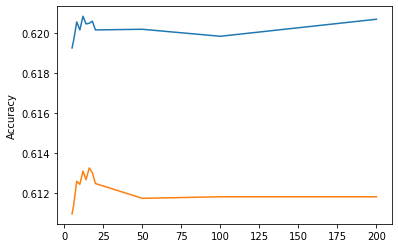

In [25]:
x_train_selected = x_train[['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]
x_val_selected = x_val[['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]
tres_num = [5, 6, 8, 10, 12, 14, 16, 18, 20, 50, 100, 200]

acc_train = []
acc_val = []

for num in tres_num:
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=num,
                                    max_depth=5,
                                    random_state=1,
                                    n_jobs=2)

    forest.fit(x_train_selected, y_train.values.ravel())
    
    y_train_pred = forest.predict(x_train_selected)
    y_val_pred = forest.predict(x_val_selected)

    acc_train.append(accuracy_score(y_train.values.ravel(), y_train_pred))
    acc_val.append(accuracy_score(y_val.values.ravel(), y_val_pred))

    print('%d tree, Training Accuracy: %.5f, Testing Accuracy: %.5f' 
      % (num, accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)))
    
plt.plot(tres_num, acc_train)
plt.plot(tres_num, acc_val)
plt.ylabel('Accuracy') 
plt.show()

## 可以看到在tree數量超過20後，會有overfit之情形，因此這邊我們選用accuracy最高之model(n_estimators = 16)來預測test data

# 輸出test data預測結果

In [26]:
X_train_selected = X_train[['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]
X_test_selected = X_test[['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]

forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=16,
                                    max_depth=5,
                                    random_state=1,
                                    n_jobs=2)
forest.fit(X_train_selected, Y_train.values.ravel())
y_pred = forest.predict(X_test_selected)
y_pred = np.append(['FGM'], y_pred)

if not os.path.exists('./output'):
  os.makedirs('./output')
np.savetxt("output/y_pred.csv", y_pred, fmt="%s", delimiter=",")